# Problem Session 7
## Forecasting The Bachelorette and Pumpkin Spice II

In the second of two time series based problem sessions you build upon your work in `Problem Session 6`. In particular you will look to build the best forecast you can for the Bachelorette IMDB ratings. Afterwards you will be introduced to seasonal ARIMA models with the pumpkin spice Google trends data.

The problems in this notebook will cover the content covered in our `Time Series Forecasting` lectures including:
- `Averaging and Smoothing`,
- `Stationarity and Autocorrelation` and
- `ARIMA`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from datetime import datetime

set_style("whitegrid")

#### 1. The Bachelorette

##### a.

- Reload the Bachelorette IMDB data stored in `the_bachelorette.csv` in the `data` folder. 
- Look at the first five rows.
- Then make a train test split setting aside the last three episodes as a test set.

In [4]:
tv = pd.read_csv("../../data/the_bachelorette.csv")

In [5]:
tv.head()

,episode_number,title,season,season_episode_number,imdb_rating
0,1,Episode #1.1,1,1,6.201235
1,2,Episode #1.2,1,2,6.201235
2,3,Episode #1.3,1,3,5.301235
3,4,Episode #1.4,1,4,5.801235
4,5,Episode #1.5,1,5,5.801235


In [6]:
tv_train = tv.iloc[:-3].copy()
tv_test = tv.drop(tv_train.index).copy()

##### b.

Here is a refresher on the columns of this data.

- `episode_number` is the number of the episode with respect to the entire series run,
- `title` is the title of the episode,
- `season` is the number of the season in which the episode aired,
- `season_episode_number` is the number of the episode with respect to the season in which it aired,
- `imdb_rating` is the average rating of the episode among IMDB's users.

##### c.

The first model you will fit is a moving average model. In this problem you will be tuning the moving average window size, $q$, to find the value that minimizes the average cross-validation root mean squared error (RMSE).

Fill in the missing chunks of code to perform hyperparameter tuning for $q$.

##### Sample Solution

In [7]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [8]:
cv = TimeSeriesSplit(10, test_size=3)

start = 2
end = 31
ma_rmses = np.zeros((10, len(range(start, end))))


i = 0
for train_index, test_index in cv.split(tv_train):
    tv_tt = tv_train.iloc[train_index]
    tv_ho = tv_train.iloc[test_index]
    
    j = 0
    for q in range(start, end):
        pred = tv_tt.imdb_rating[-q:].mean() * np.ones(len(tv_ho))
        
        ma_rmses[i,j] = np.sqrt(mean_squared_error(tv_ho.imdb_rating.values, pred))
        j = j + 1
    i = i + 1

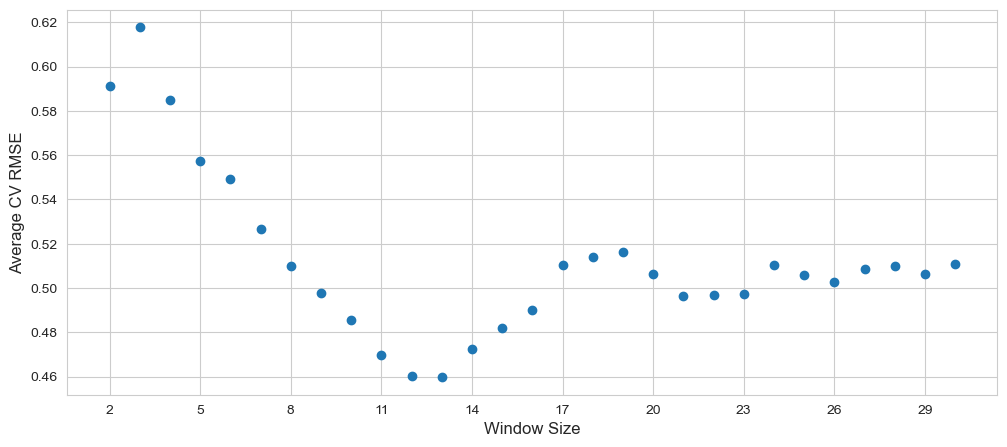

In [9]:
plt.figure(figsize=(12,5))

plt.scatter(range(start,end), np.mean(ma_rmses, axis=0))

plt.xlabel("Window Size", fontsize=12)
plt.ylabel("Average CV RMSE", fontsize=12)

plt.xticks(range(start, end, 3), fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [10]:
print("The window size that minimized the avg. cv rmse",
      "was q =", 
      range(start,end)[np.argmin(np.mean(ma_rmses, axis=0))],
      "\b.",
      "It had a mean cv rmse of", 
      np.round(np.min(np.mean(ma_rmses, axis=0)), 3))

The window size that minimized the avg. cv rmse was q = 13. It had a mean cv rmse of 0.46


##### d.

The second model you will try is an exponential smoothing model.

Because these data exhibit a trend but not seasonality we will fit a double exponential smoothing model. For this we will want to find the best $\alpha$ (The smoothing on the time series) and $\beta$ (the smoothing on the trend component).

Fill in the missing code chunks below to perform a grid search for the values of $\alpha$ and $\beta$ that minimize the average CV RMSE. (Note that a grid search is what we call it when you perform hyperparameter tuning with a grid of possible hyperparameter values).

##### Sample Solution

In [11]:
from statsmodels.tsa.holtwinters import Holt

In [12]:
exp_rmses = np.zeros((10, len(np.arange(0, 0.2, .01)), len(np.arange(0, 0.2, .01))))

i = 0
for train_index, test_index in cv.split(tv_train):
    tv_tt = tv_train.iloc[train_index]
    tv_ho = tv_train.iloc[test_index]
    
    j = 0
    for alpha in np.arange(0, 0.2, .01):
        k = 0
        for beta in np.arange(0, 0.2, .01):
            print("alpha =", alpha,
                     "beta =", beta)

            exp_smooth = Holt(tv_tt.imdb_rating.values).fit(smoothing_level=alpha, 
                                                                      smoothing_trend=beta,
                                                                      optimized=False)

            exp_rmses[i,j,k] = np.sqrt(mean_squared_error(tv_ho.imdb_rating.values, 
                                                          exp_smooth.forecast(len(tv_ho))))
            k = k + 1
        j = j + 1
    i = i + 1

alpha = 0.0 beta = 0.0
alpha = 0.0 beta = 0.01
alpha = 0.0 beta = 0.02
alpha = 0.0 beta = 0.03
alpha = 0.0 beta = 0.04
alpha = 0.0 beta = 0.05
alpha = 0.0 beta = 0.06
alpha = 0.0 beta = 0.07
alpha = 0.0 beta = 0.08
alpha = 0.0 beta = 0.09
alpha = 0.0 beta = 0.1
alpha = 0.0 beta = 0.11
alpha = 0.0 beta = 0.12
alpha = 0.0 beta = 0.13
alpha = 0.0 beta = 0.14
alpha = 0.0 beta = 0.15
alpha = 0.0 beta = 0.16
alpha = 0.0 beta = 0.17
alpha = 0.0 beta = 0.18
alpha = 0.0 beta = 0.19
alpha = 0.01 beta = 0.0
alpha = 0.01 beta = 0.01
alpha = 0.01 beta = 0.02
alpha = 0.01 beta = 0.03
alpha = 0.01 beta = 0.04
alpha = 0.01 beta = 0.05
alpha = 0.01 beta = 0.06
alpha = 0.01 beta = 0.07
alpha = 0.01 beta = 0.08
alpha = 0.01 beta = 0.09
alpha = 0.01 beta = 0.1
alpha = 0.01 beta = 0.11
alpha = 0.01 beta = 0.12
alpha = 0.01 beta = 0.13
alpha = 0.01 beta = 0.14
alpha = 0.01 beta = 0.15
alpha = 0.01 beta = 0.16
alpha = 0.01 beta = 0.17
alpha = 0.01 beta = 0.18
alpha = 0.01 beta = 0.19
alpha = 0.02 beta = 0.0


In [13]:
## This gives us the indices of the smallest
## avg cv rmse
exp_ind = np.unravel_index(np.argmin(np.mean(exp_rmses, axis=0), axis=None), 
                           np.mean(exp_rmses, axis=0).shape)
np.unravel_index(np.argmin(np.mean(exp_rmses, axis=0), axis=None), 
                 np.mean(exp_rmses, axis=0).shape)

(1, 14)

In [14]:
print("The alpha and beta values that give a double exponential",
         "smoothing model with lowest avg cv rmse are",
         "alpha = ", np.arange(0, 0.2, .01)[exp_ind[0]],
         "and beta = ", np.arange(0, 0.2, .01)[exp_ind[1]])

print("This model had an avg cv rmse of",
         np.round(np.mean(exp_rmses, axis=0)[exp_ind],3))

The alpha and beta values that give a double exponential smoothing model with lowest avg cv rmse are alpha =  0.01 and beta =  0.14
This model had an avg cv rmse of 0.453


##### e.

The final model you will try is an ARIMA model. 

First let's check the stationarity assumption for this time series. Make an autocorrelation plot of the training data. If you find that the ACF plot indicates that the time series is non-stationary, plot the ACF of the time series' first differences. Do these appear to be stationary?

##### Sample Solution

In [15]:
import statsmodels.api as sm

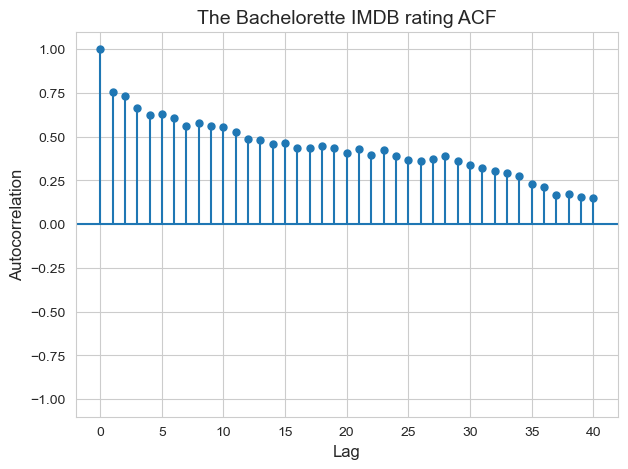

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

sm.graphics.tsa.plot_acf(tv_train.imdb_rating.values,
                            alpha=None,
                            lags = 40,
                            ax = ax)

plt.title('The Bachelorette IMDB rating ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

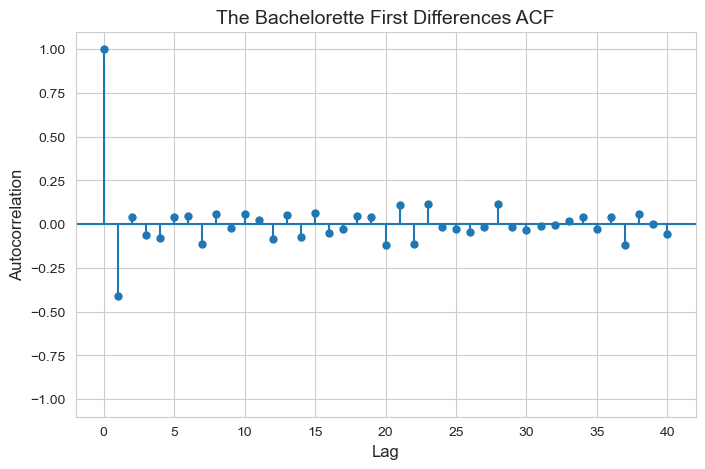

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

sm.graphics.tsa.plot_acf(tv_train.imdb_rating.diff().values[1:],
                               alpha=None,
                               lags=40,
                               ax=ax)

plt.title('The Bachelorette First Differences ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

##### f.

From what we saw above what we should set our $d$ value in the ARIMA model?. Set $d$ to this value and then perform hyperparameter tuning to find the values of $p$ and $q$ that give us the lowest mean CV RMSE.

##### Sample Solution

In [18]:
from statsmodels.tsa.api import SARIMAX

In [19]:
arima_rmses = np.zeros((10, 4, 4))

i = 0
for train_index, test_index in cv.split(tv_train):
    ### NOTE THE ORIGINAL COPY HAD A TYPO
    ### should be iloc not loc
    tv_tt = tv_train.iloc[train_index]
    tv_ho = tv_train.iloc[test_index]
    
    j = 0
    for p in range(4):
        k = 0
        for q in range(4):
            arima = SARIMAX(tv_tt.imdb_rating.values,
                               order=(p, 1, q)).fit(maxiter=500)
            
            arima_rmses[i,j,k] = np.sqrt(mean_squared_error(tv_ho.imdb_rating.values, 
                                                   arima.forecast(len(tv_ho))))
            k = k +1
        j = j + 1
    i = i +1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01600D+00    |proj g|=  7.99934D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      6      1     0     0   2.446D-05   1.016D+00
  F =   1.0159914027673631     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  9.38427D-01    |proj g|=  8.34422D-02

At iterate   10    f=  9.16847D-01    |proj g|=  4.29442D-02

At iterate   15    f=  9.01987D-01    |proj g|=  2.54280D-01

At iterate   20    f=  8.98362D-01    |proj g|=  4.59209D-02

At iterate   25    f=  8.95527D-01    |proj g|=  1.20369D-01

At iterate   30    f=  8.89529D-01    |proj g|=  2.13881D-02

At iterate   35    f=  8.88859D-01    |proj g|=  2.34672D-03

At iterate   40    f=  8.88752D-01    |proj g|=  9.16374D-03

At iterate   45    f=  8.87980D-01    |proj g|=  3.62370D-03

At iterate   50    f=  8.87765D-01    |proj g|=  2.25307D-02

At iterate   55    f=  8.87744D-01    |proj g|=  1.15392D-03

At iterate   60    f=  8.87743D-01    |proj g|=  5.10426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 This problem is u

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02229D+00    |proj g|=  7.82271D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      6      1     0     0   2.437D-05   1.022D+00
  F =   1.0222790961164308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.16279D-01    |proj g|=  2.08464D-01

At iterate    5    f=  9.07806D-01    |proj g|=  3.54992D-02

At iterate   10    f=  9.06770D-01    |proj g|=  3.72830D-03

At iterate   15    f=  9.05207D-01    |proj g|=  5.35232D-02

At iterate   20    f=  9.03636D-01    |proj g|=  1.80216D-03

At iterate   25    f=  9.03607D-01    |proj g|=  2.38446D-03

At iterate   30    f=  9.03599D-01    |proj g|=  2.59644D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 T


At iterate   15    f=  9.01364D-01    |proj g|=  1.03425D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   7.960D-07   9.013D-01
  F =  0.90134744094604591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05463D-01    |proj g|=  8.53067D-02

At iterate    5    f=  9.01440D-01    |proj g|=  1.15345D-02

At iterate   10    f=  9.00514D-01    |proj g|=  2.87196D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  8.99975D-01    |proj g|=  8.03308D-04

At iterate   15    f=  8.99710D-01    |proj g|=  2.48349D-02

At iterate   20    f=  8.99607D-01    |proj g|=  4.95600D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   2.243D-05   8.996D-01
  F =  0.89960698801432759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32576D+00    |proj g|=  1.45675D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 T


At iterate    5    f=  8.98497D-01    |proj g|=  3.18293D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   9.217D-06   8.985D-01
  F =  0.89849106248385613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.43643D-01    |proj g|=  8.21593D-03

At iterate    5    f=  9.43634D-01    |proj g|=  1.31750D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.99252D-01    |proj g|=  3.10364D-02

At iterate   20    f=  8.97674D-01    |proj g|=  1.58326D-02

At iterate   25    f=  8.97324D-01    |proj g|=  7.62439D-03

At iterate   30    f=  8.97295D-01    |proj g|=  7.35921D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     38      1     0     0   7.359D-05   8.973D-01
  F =  0.89729475572253337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 T


At iterate    5    f=  8.96952D-01    |proj g|=  1.09174D-02

At iterate   10    f=  8.95985D-01    |proj g|=  5.79127D-03

At iterate   15    f=  8.95385D-01    |proj g|=  3.16955D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   2.370D-05   8.954D-01
  F =  0.89537907981972276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97996D-01    |proj g|=  8.18751D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.87088D-01    |proj g|=  6.38279D-04

At iterate   25    f=  8.87064D-01    |proj g|=  1.68973D-02

At iterate   30    f=  8.86777D-01    |proj g|=  4.50204D-02

At iterate   35    f=  8.86424D-01    |proj g|=  7.18204D-02

At iterate   40    f=  8.85957D-01    |proj g|=  4.84829D-02

At iterate   45    f=  8.85694D-01    |proj g|=  2.14870D-02

At iterate   50    f=  8.85599D-01    |proj g|=  1.44618D-02

At iterate   55    f=  8.85576D-01    |proj g|=  7.13599D-03

At iterate   60    f=  8.85400D-01    |proj g|=  1.97115D-02

At iterate   65    f=  8.85327D-01    |proj g|=  5.63886D-03

At iterate   70    f=  8.85273D-01    |proj g|=  1.97844D-02

At iterate   75    f=  8.85243D-01    |proj g|=  1.10756D-02

At iterate   80    f=  8.85227D-01    |proj g|=  1.16006D-02

At iterate   85    f=  8.85214D-01    |proj g|=  1.74543D-03

At iterate   90    f=  8.85207D-01    |proj g|=  5.37956D-03

At iterate   95    f=  8.85203D-01    |proj g|=  2.34354D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.27719D-01    |proj g|=  1.77218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   3.486D-06   9.277D-01
  F =  0.92771704873796701     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.88444D-01    |proj g|=  6.97481D-03

At iterate   20    f=  8.88183D-01    |proj g|=  2.72841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   6.085D-06   8.882D-01
  F =  0.88818282965597184     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88825D-01    |proj g|=  2.05840D-01

At iterate    5    f=  8.82837D-01    |proj g|=  1.31841D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.02417D-01    |proj g|=  9.12283D-03

At iterate   10    f=  8.89979D-01    |proj g|=  9.37138D-02

At iterate   15    f=  8.87433D-01    |proj g|=  2.20497D-02

At iterate   20    f=  8.86609D-01    |proj g|=  1.55415D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   1.473D-05   8.866D-01
  F =  0.88660903662161572     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  8.81092D-01    |proj g|=  1.27762D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   8.019D-06   8.811D-01
  F =  0.88109112579719573     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88590D-01    |proj g|=  7.19756D-02

At iterate    5    f=  8.85092D-01    |proj g|=  1.98408D-02

At iterate   10    f=  8.81509D-01    |proj g|=  1.36203D-03

At itera

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.07142D-01    |proj g|=  4.11395D-02

At iterate    5    f=  8.91796D-01    |proj g|=  1.64227D-01

At iterate   10    f=  8.87882D-01    |proj g|=  1.63518D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   2.679D-06   8.879D-01
  F =  0.88788094728102318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10



 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  8.69260D-01    |proj g|=  3.36969D-02

At iterate   30    f=  8.68309D-01    |proj g|=  1.52766D-02

At iterate   35    f=  8.68148D-01    |proj g|=  1.47165D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     61      1     0     0   1.259D-05   8.681D-01
  F =  0.86814835142746483     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00067D+00    |proj g|=  7.19459D-03

        


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 T


At iterate   15    f=  8.77565D-01    |proj g|=  1.72670D-02

At iterate   20    f=  8.77387D-01    |proj g|=  1.03987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   1.040D-05   8.774D-01
  F =  0.87738685040766418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81395D-01    |proj g|=  8.20036D-02

At iterate    5    f=  8.77586D-01    |proj g|=  1.13843D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   1.732D-05   8.756D-01
  F =  0.87559322914831184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78599D-01    |proj g|=  1.94130D-01

At iterate    5    f=  8.72725D-01    |proj g|=  4.41958D-02

At iterate   10    f=  8.72311D-01    |proj g|=  2.75724D-02

At iterate   15    f=  8.71602D-01    |proj g|=  4.56281D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.79961D-01    |proj g|=  1.93382D-02

At iterate   15    f=  8.78796D-01    |proj g|=  3.76358D-02

At iterate   20    f=  8.78246D-01    |proj g|=  7.17510D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   1.399D-05   8.782D-01
  F =  0.87824644621895920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.73461D-01    |proj g|=  1.85868D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.90839D-01    |proj g|=  4.42159D-02

At iterate   10    f=  8.75668D-01    |proj g|=  1.24748D-02

At iterate   15    f=  8.73951D-01    |proj g|=  1.41039D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   2.820D-06   8.739D-01
  F =  0.87394945211045516     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81023D-01    |proj g|=  7.38239D-02

At iter

In [20]:
arima_ind = np.unravel_index(np.argmin(np.mean(arima_rmses, axis=0), axis=None), 
                             np.mean(arima_rmses, axis=0).shape)
np.unravel_index(np.argmin(np.mean(arima_rmses, axis=0), axis=None), 
                 np.mean(arima_rmses, axis=0).shape)

(1, 3)

In [21]:
print("The p and q values that give an ARIMA model",
         "with lowest avg cv mse are",
         "p = ", range(4)[arima_ind[0]],
         "and q = ", range(4)[arima_ind[1]])

print("This model had an avg cv mse of",
         np.round(np.mean(arima_rmses, axis=0)[arima_ind],3))

The p and q values that give an ARIMA model with lowest avg cv mse are p =  1 and q =  3
This model had an avg cv mse of 0.529


##### g.

Compare the best RMSE you attained in this notebook to the best RMSE for the baseline models in the completed version of `Problem Session 6`.

Plot the best forecast with the training and test data. What is the RMSE of the forecast on the test data?

##### Sample Solution

In [22]:
holt = Holt(tv_train.imdb_rating.values).fit(smoothing_level=.01, 
                                              smoothing_trend=.14,
                                              optimized=False)

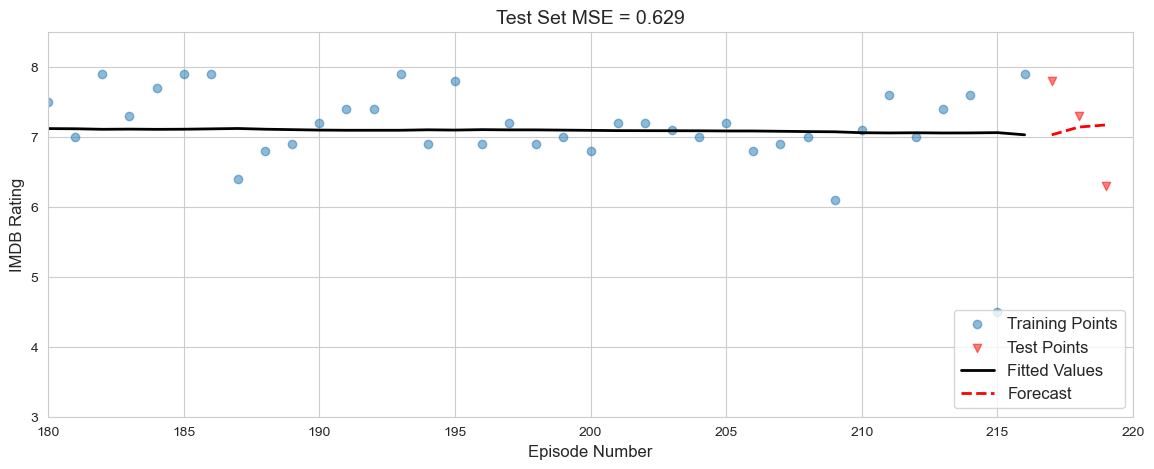

In [23]:
plt.figure(figsize=(14,5))

plt.scatter(tv_train.episode_number,
               tv_train.imdb_rating,
               alpha=.5,
               label="Training Points")

plt.scatter(tv_test.episode_number,
               tv_test.imdb_rating,
               alpha=.5,
               c = 'red',
               marker = 'v',
               label="Test Points")

plt.plot(tv_train.episode_number,
            holt.fittedvalues,
            'k-',
            linewidth = 2,
            label="Fitted Values")

plt.plot(tv_test.episode_number,
            arima.forecast(len(tv_test)),
            'r--',
            linewidth=2,
            label="Forecast")

plt.legend(fontsize=12, loc=4)

test_mse = np.sqrt(mean_squared_error(tv_test.imdb_rating.values, 
                                       holt.forecast(len(tv_test))))

plt.title("Test Set MSE = " + str(np.round(test_mse,3)),
             fontsize=14)

plt.xlabel("Episode Number", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)


plt.ylim(3,8.5)
plt.xlim(180,220)

plt.show()

#### 2. Pumpkin spice seasonal ARIMA

In this problem you will be introduces to seasonal ARIMA models with the pumpkin spice Google trend data. This will be a surface level introduction, for a more in depth look check out the time series practice problems `jupyter notebook`.

##### a.

Load the data stored in `pumpkin_spice.csv` in the `Data` folder then look at the first five rows. Then make a train test split setting aside all observations on or after January 1, 2022 aside as the test set.

##### Sample Solution

In [26]:
pumpkin = pd.read_csv("../../data/pumpkin_spice.csv",
                         parse_dates = ["Month"])

In [27]:
p_train = pumpkin.loc[pumpkin.Month < datetime(2022, 1, 1)].copy()
p_test = pumpkin.drop(p_train.index).copy()

##### b.

In lecture we talked about first differencing non-stationary time series exhibiting a trend to create a, seemingly, stationary time series.

This can also be done for seasonal data. Suppose that we suspect a time series, $\left\lbrace y_t \right\rbrace$ exhibits seasonality where a season lasts $m$ time steps. Then the first seasonal differenced time series is:

$$
\nabla_s y_t = y_t - y_{t-m}.
$$

Plot the autocorrelation of the training set, then perform first seasonal differencing on these data and plot the autocorrelation of the first seasonal differenced series.

Does the differenced series appear less likely to violate stationarity?

##### Sample Solution

In [28]:
import statsmodels.tsa.api as sm

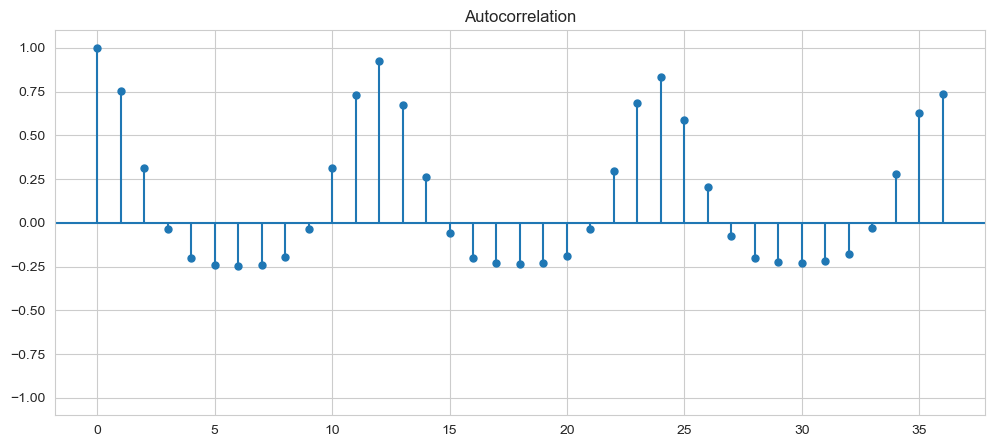

In [29]:
fig,ax = plt.subplots(1,1, figsize=(12,5))

sm.graphics.plot_acf(p_train.interest_level.values,
                        alpha=None, 
                        lags = 36,
                        ax = ax)

plt.ylim([-1.1,1.1])

plt.show()

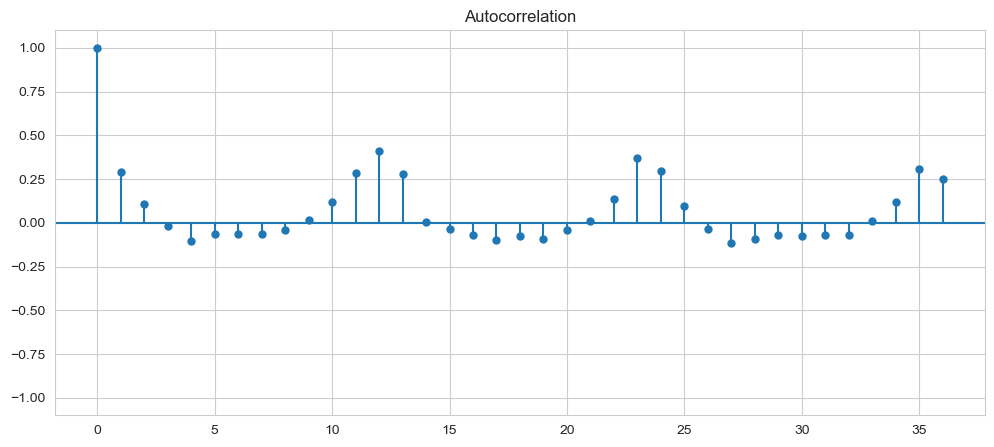

In [30]:
fig,ax = plt.subplots(1,1, figsize=(12,5))

sm.graphics.plot_acf(p_train.interest_level.diff(12)[12:],
                        alpha=None, 
                        lags = 36,
                        ax = ax)

plt.ylim([-1.1,1.1])

plt.show()

These data appear to less egregiously violate stationarity, but it may be reasonable to consider second differencing.

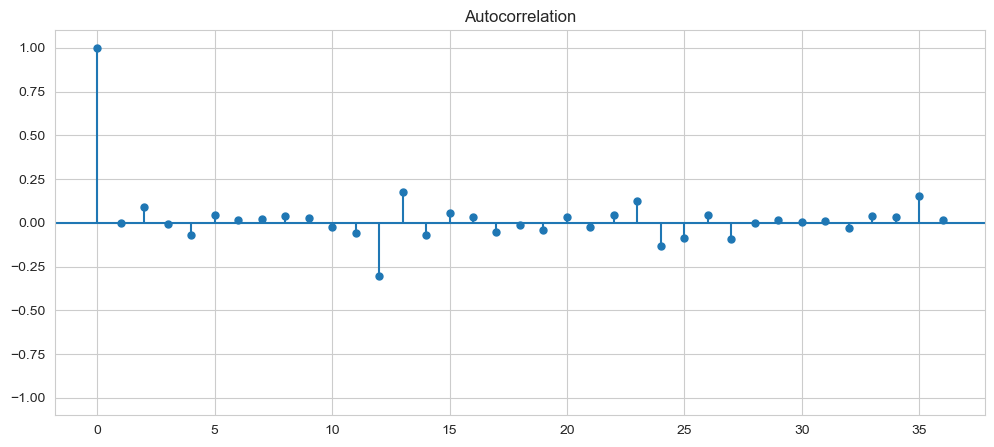

In [31]:
fig,ax = plt.subplots(1,1, figsize=(12,5))

sm.graphics.plot_acf(p_train.interest_level.diff(12)[12:].diff(12)[12:],
                        alpha=None, 
                        lags = 36,
                        ax = ax)

plt.ylim([-1.1,1.1])

plt.show()

##### c.

While traditional $\text{ARIMA}$ models do not work well for seasonal data, there are seasonal ARIMA ($\text{SARIMA}$) models as well. Recall for an $\text{ARIMA}$ model you needed parameters $p$, $d$ and $q$. For a $\text{SARIMA}$ model you need parameters $P$, $D$, $Q$ and $m$ here:

- $P$ is the order of the seasonal autoregressive portion of the model,
- $Q$ is the order of the seasonal moving average portion of the model,
- $D$ is the order of the seasonal differencing and
- $m$ is the number of time steps that take place in a single period.

You should have an idea of a value for $D$ from <i>b.</i> and we know $m=12$. In this problem you will fit a $\text{SARIMA}$ model on the pumpkin spice data using `statsmodels` `SARIMAX`. Choose whatever values you would like for $p$, $P$, $q$ and $Q$.

##### Sample Solution

In [32]:
sarima = SARIMAX(p_train.interest_level.values,
                    order = (1,0,1),
                    seasonal_order = (1,1,1,12)).fit(maxiter=200)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59553D+00    |proj g|=  1.43902D-01

At iterate    5    f=  2.56937D+00    |proj g|=  4.81223D-03

At iterate   10    f=  2.56875D+00    |proj g|=  2.59023D-03

At iterate   15    f=  2.56868D+00    |proj g|=  2.65344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   2.662D-06   2.569D+00
  F =   2.5686749114631962     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


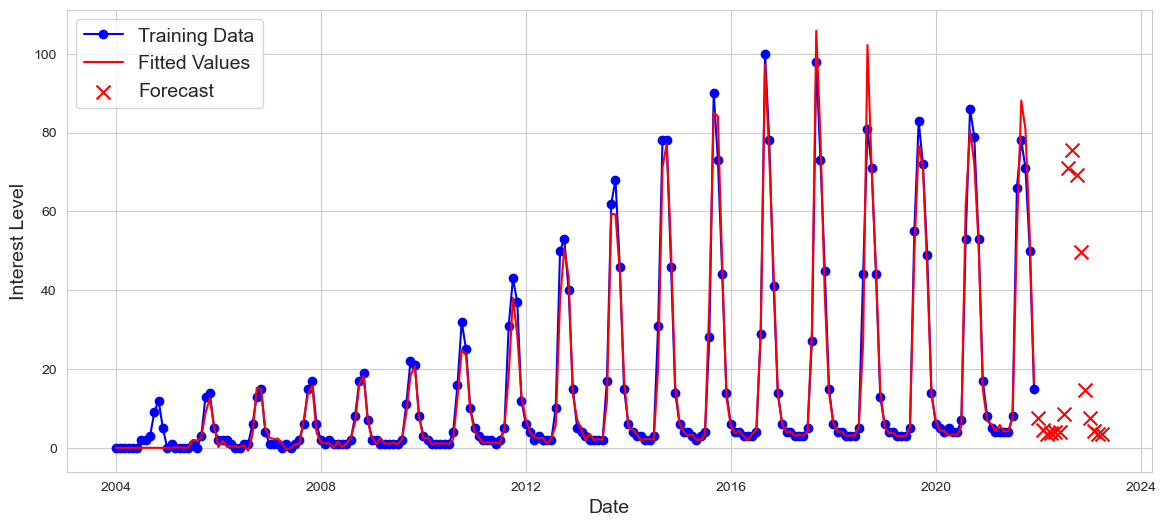

In [33]:
plt.figure(figsize=(14,6))

plt.plot(p_train.Month,
            p_train.interest_level,
            'b-o',
            label='Training Data')

plt.plot(p_train.Month,
            sarima.fittedvalues,
            'r',
            label='Fitted Values')

plt.scatter(p_test.Month,
               sarima.forecast(len(p_test)),
               c='r',
               marker='x',
               s=100,
               label="Forecast")

plt.legend(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Interest Level", fontsize=14)

plt.show()

##### d. 

Get the average cross-validation MSE for the SARIMA model you fit above. Use 5-fold cross-validation with a test set size of 12.


How does it compare to the baseline models from `Problem Session 6`? <i>Feel free to use the answer from the completed version `Problem Session 6` if you did not complete it</i>.

##### Sample Solution

In [34]:
cv = TimeSeriesSplit(5, test_size=12)

In [35]:
rmses = np.zeros(5)

i = 0
for train_index, test_index in cv.split(p_train):
    p_tt = p_train.iloc[train_index]
    p_ho = p_train.iloc[test_index]
    
    sarima = SARIMAX(p_tt.interest_level.values,
                    order = (1,0,1),
                    seasonal_order = (1,1,1,12)).fit(maxiter=200)
    
    rmses[i] = np.sqrt(mean_squared_error(p_ho.interest_level.values,
                                             sarima.forecast(12)))
    
    i = i + 1

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37715D+00    |proj g|=  3.15535D-01

At iterate    5    f=  2.25907D+00    |proj g|=  7.62395D-03

At iterate   10    f=  2.25803D+00    |proj g|=  5.02396D-04

At iterate   15    f=  2.25803D+00    |proj g|=  6.02354D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   6.024D-06   2.258D+00
  F =   2.2580276655882581     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56966D+00    |proj g|=  2.06547D-01

At iterate    5    f=  2.50087D+00    |proj g|=  1.73626D-02

At iterate   10    f=  2.49823D+00    |proj g|=  4.11580D-03

At iterate   15    f=  2.49436D+00    |proj g|=  1.30434D-02

At iterate   20    f=  2.49334D+00    |proj g|=  2.53466D-03

At iterate   25    f=  2.49318D+00    |proj g|=  1.69145D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   

 This problem is unconstrained.


In [36]:
np.mean(rmses)

4.9908503658794

For me this was lower than the seasonal average baseline, but slightly higher than the seasonal naive baseline. That's not to say we would not be able to do better than the baseline, we have not done any hyperparameter tuning of the $p, q, P,$ or $Q$ values.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)